<a href="https://colab.research.google.com/github/anyfish/pet_identifier/blob/main/Gatos_y_Perros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Descarga del set de datos
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

In [ ]:
# Ver metadatos
metadatos

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='~/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

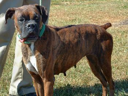
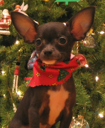
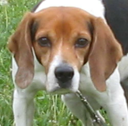
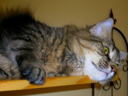
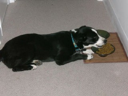

In [ ]:
# Ver imagenes de ds
tfds.as_dataframe(datos['train'].take(5), metadatos)

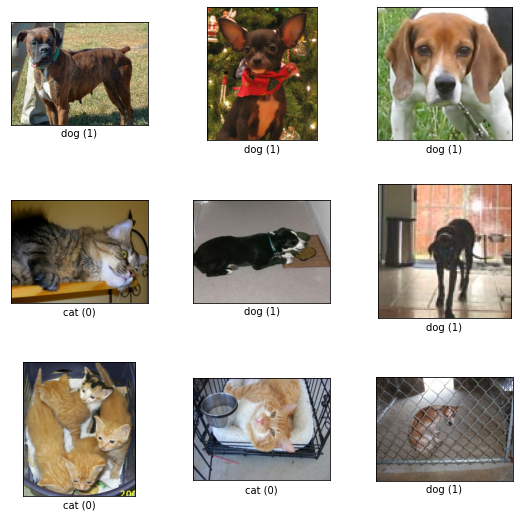

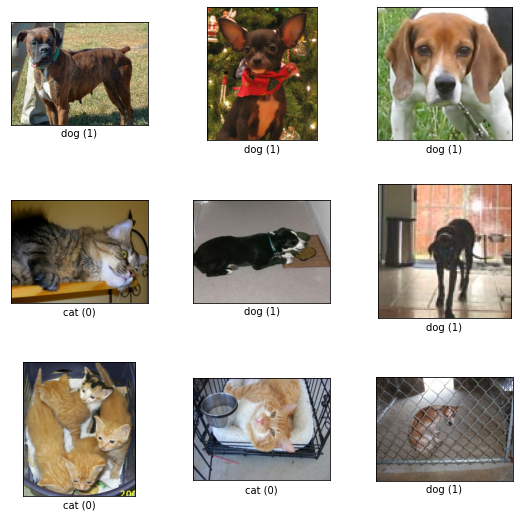

In [ ]:
tfds.show_examples(datos['train'], metadatos)

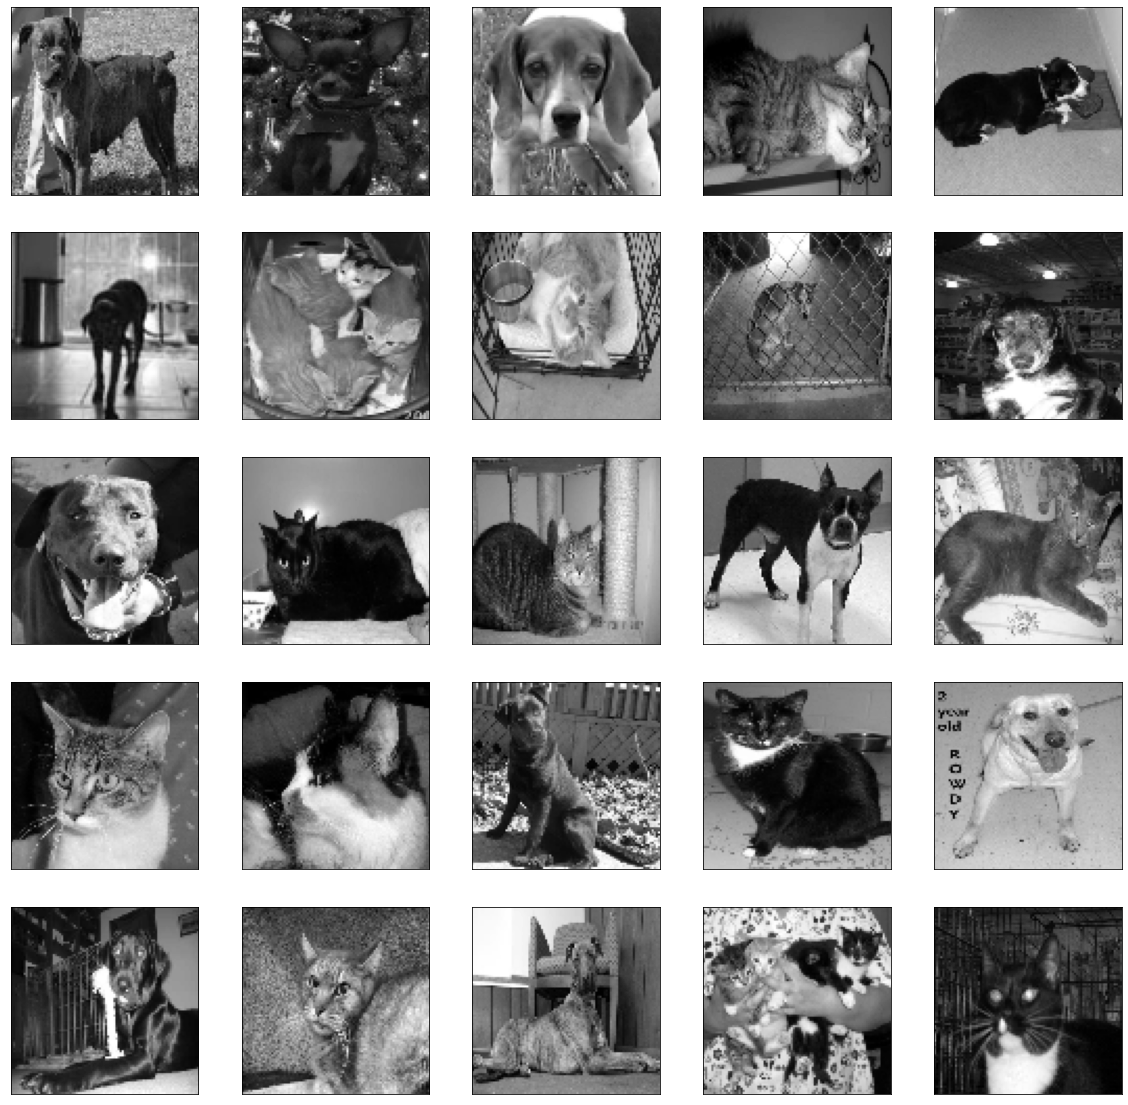

In [ ]:
import matplotlib.pyplot as plt
import cv2

plt.figure(figsize=(20,20))

TAMANO_IMG = 90

for i, (imagen, etiqueta) in enumerate(datos['train'].take(25)):
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray')

In [ ]:
datos_entrenamiento = []

In [ ]:
for i, (imagen, etiqueta) in enumerate(datos['train']): # TODOS LOS DATOS
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(TAMANO_IMG, TAMANO_IMG, 1) # CAMBIAR EL TAMAÑO A 100, 100, 1
  datos_entrenamiento.append([imagen, etiqueta]) # SE AGREGA IAMGEN MODIFICADA AL ARREGLO

In [ ]:
datos_entrenamiento[0]

[array([[[241],
         [172],
         [ 95],
         ...,
         [196],
         [193],
         [149]],
 
        [[221],
         [110],
         [ 86],
         ...,
         [192],
         [190],
         [192]],
 
        [[147],
         [ 94],
         [ 84],
         ...,
         [133],
         [151],
         [145]],
 
        ...,
 
        [[128],
         [121],
         [189],
         ...,
         [128],
         [160],
         [119]],
 
        [[147],
         [164],
         [156],
         ...,
         [ 74],
         [165],
         [155]],
 
        [[103],
         [101],
         [186],
         ...,
         [ 54],
         [ 47],
         [ 54]]], dtype=uint8), <tf.Tensor: shape=(), dtype=int64, numpy=1>]

In [ ]:
len(datos_entrenamiento) # Numero de imagen en el arreglo

23262

In [ ]:
X = [] # caracteristicas
y = [] # etiquetas

# Se hae iteración para que cada variable tenga los valroes correspondientes
for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
X

[array([[[241],
         [172],
         [ 95],
         ...,
         [196],
         [193],
         [149]],
 
        [[221],
         [110],
         [ 86],
         ...,
         [192],
         [190],
         [192]],
 
        [[147],
         [ 94],
         [ 84],
         ...,
         [133],
         [151],
         [145]],
 
        ...,
 
        [[128],
         [121],
         [189],
         ...,
         [128],
         [160],
         [119]],
 
        [[147],
         [164],
         [156],
         ...,
         [ 74],
         [165],
         [155]],
 
        [[103],
         [101],
         [186],
         ...,
         [ 54],
         [ 47],
         [ 54]]], dtype=uint8), array([[[154],
         [ 92],
         [ 93],
         ...,
         [ 87],
         [ 73],
         [ 78]],
 
        [[104],
         [ 66],
         [ 78],
         ...,
         [116],
         [ 74],
         [ 65]],
 
        [[ 84],
         [ 58],
         [ 62],
         ...,
       

In [ ]:
# NORMALIZACIÓN 
# Valores entre 0 y 1

import numpy as np

X = np.array(X).astype(float) / 255

In [ ]:
y = np.array(y)

In [ ]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
X.shape

(23262, 90, 90, 1)

## Arquitectura e Hyperparametros

In [ ]:
modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100, 1)),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


modeloCNN2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
modeloDenso.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

modeloCNN.compile(optimizer='adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

modeloCNN2.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
tensorboardDenso = TensorBoard(log_dir='logs/denso')

modeloDenso.fit(X, y, batch_size=32,
                validation_split=0.15,
                epochs=100,
                callbacks=[tensorboardDenso])

Epoch 1/100


ValueError: ignored